# Data Science Practice

## Below is a demonstration of: 

   - Exploratory Data Analysis
   - Focusing on a particular metric
   - Cleaning/Transforming the data from the chosen metric
   - Visualizing that data
   - Extracting specific data from particular metrics

In [47]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Reading the data from a locally stored csv files
# The file has details about every game played from the 2004 - 2021 NBA season

df = pd.read_csv('games_details.csv', index_col=None, header=0, engine='python')

## Exploratory Data Analysis

In [49]:
# Observing the beginning of the file contents
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [50]:
# Getting the amount of rows & columns
df.shape

(626111, 29)

In [51]:
# Getting the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            626111 non-null  int64  
 1   TEAM_ID            626111 non-null  int64  
 2   TEAM_ABBREVIATION  626111 non-null  object 
 3   TEAM_CITY          626111 non-null  object 
 4   PLAYER_ID          626111 non-null  int64  
 5   PLAYER_NAME        626111 non-null  object 
 6   NICKNAME           10485 non-null   object 
 7   START_POSITION     239375 non-null  object 
 8   COMMENT            102359 non-null  object 
 9   MIN                523751 non-null  object 
 10  FGM                523751 non-null  float64
 11  FGA                523751 non-null  float64
 12  FG_PCT             523751 non-null  float64
 13  FG3M               523751 non-null  float64
 14  FG3A               523751 non-null  float64
 15  FG3_PCT            523751 non-null  float64
 16  FT

In [52]:
# Extracting several cumulative metrics from every column
df.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,6.261110e+05,6.261110e+05,6.261110e+05,523751.000000,523751.000000,523751.000000,523751.000000,523751.00000,523751.000000,523751.000000,...,523751.000000,523751.000000,523751.000000,523751.00000,523751.000000,523751.000000,523751.000000,523751.000000,523751.000000,500090.000000
mean,2.164553e+07,1.610613e+09,3.451868e+05,3.574498,7.878062,0.415843,0.753051,2.11503,0.197427,1.738716,...,1.028187,3.026999,4.055187,2.09036,0.722950,0.461782,1.325151,2.006984,9.640753,-0.000356
std,5.656110e+06,8.649604e+00,7.461713e+06,3.019116,5.657840,0.251636,1.205652,2.52168,0.289293,2.356272,...,1.401890,2.685872,3.487341,2.46903,0.974351,0.865591,1.402568,1.503485,8.039700,10.611897
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.060092e+07,1.610613e+09,2.419000e+03,1.000000,3.000000,0.250000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120022e+07,1.610613e+09,2.011440e+05,3.000000,7.000000,0.429000,0.000000,1.00000,0.000000,1.000000,...,1.000000,2.000000,3.000000,1.00000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.170020e+07,1.610613e+09,2.030920e+05,5.000000,11.000000,0.571000,1.000000,3.00000,0.375000,3.000000,...,2.000000,4.000000,6.000000,3.00000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,5.200021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.00000,1.000000,26.000000,...,18.000000,25.000000,31.000000,25.00000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


## Singling out the 'points' metric

In [53]:
# Singling out the 'points' metric for further observation
df["PTS"].describe

<bound method NDFrame.describe of 0          3.0
1          5.0
2         20.0
3         24.0
4          0.0
          ... 
626106    17.0
626107    18.0
626108     6.0
626109     2.0
626110     8.0
Name: PTS, Length: 626111, dtype: float64>

## Cleaning the Data

In [54]:
# Filling all N/A values with 0, N/A typically represents D.N.P. values
df["PTS"] = df["PTS"].fillna(0)

In [55]:
# Converting 'points' to an integer, to ensure 1/2 points will not be counted
df["PTS"]= df["PTS"].astype(int)


In [56]:
# 0-1 points count for less than one 'field goal made', so begin by dropping them from the dataset
min_pt_value = df[df["PTS"] < 2].index

df.drop(min_pt_value, inplace=True)

# Confirming the stats have been dropped from the dataset
df['PTS'].describe


<bound method NDFrame.describe of 0          3
1          5
2         20
3         24
5          2
          ..
626106    17
626107    18
626108     6
626109     2
626110     8
Name: PTS, Length: 455506, dtype: int32>

In [57]:
# Median of 'points' from every game
df["PTS"].median()

9.0

In [58]:
# Rounding the average points scored in every game
df["PTS"].mean().round()

11.0

## Visualizing the data

<AxesSubplot:>

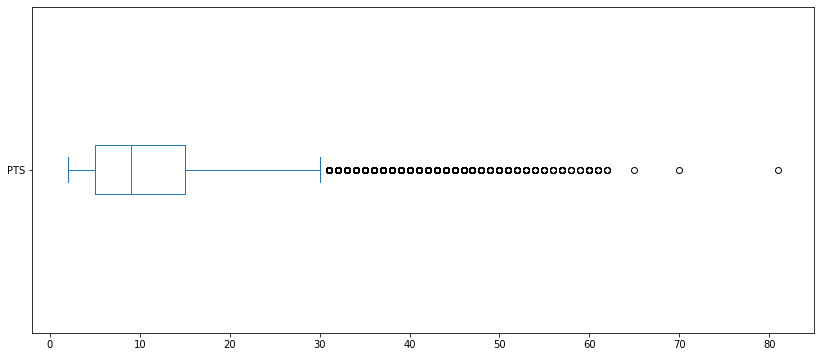

In [59]:
# Plotting the total amount of points scored using a boxplot 
df['PTS'].plot(kind='box', vert=False, figsize= (14, 6))

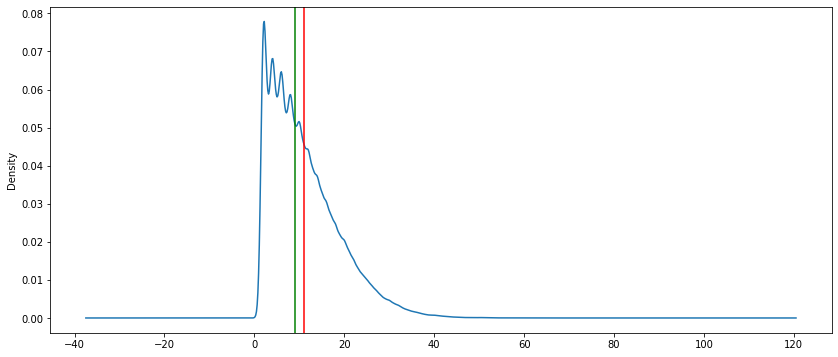

In [60]:
# Plotting 'points' using a density graph, along with highlighting the mean and median
pointstats= df['PTS'].plot(kind='density', figsize=(14, 6))
pointstats.axvline(df['PTS'].mean(), color= 'red')
pointstats.axvline(df['PTS'].median(), color= 'green')


Text(0.5, 0, 'Points Scored')

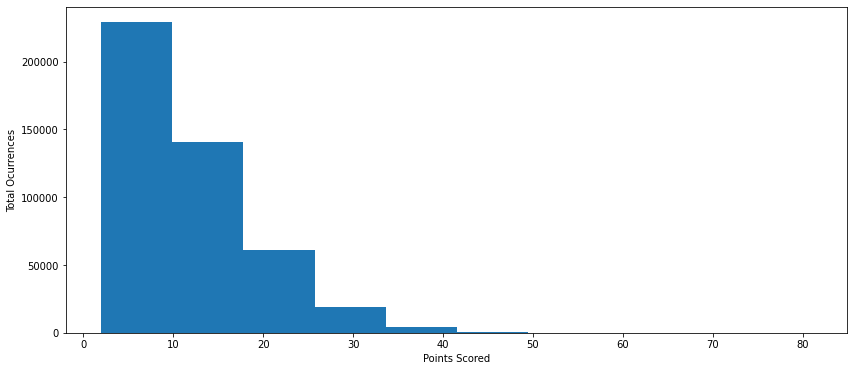

In [61]:
# Plotting 'points' using a histogram
pointstats= df['PTS'].plot(kind='hist', figsize=(14, 6))

pointstats.set_ylabel('Total Ocurrences')
pointstats.set_xlabel('Points Scored')

<AxesSubplot:xlabel='PTS', ylabel='FGM'>

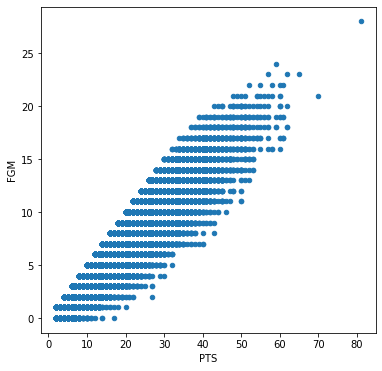

In [62]:
# Displaying a scatterplot 
# Showing a correlation between a made field goal and the amount of points in a game 
df.plot(kind="scatter", x="PTS", y="FGM", figsize=(6, 6))

<AxesSubplot:xlabel='PTS', ylabel='FG3M'>

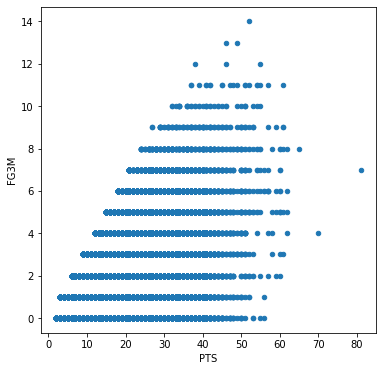

In [63]:
# Showing a correlation between a made 3 pointer and the amount of points in a game
df.plot(kind="scatter", x="PTS", y="FG3M", figsize=(6, 6))


## Extracting Data 

In [64]:
# Extracting the highest score

df[df["PTS"] == df["PTS"].max()]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
184197,20500591,1610612747,LAL,Los Angeles,977,Kobe Bryant,NaN,G,NaN,41:56,...,2.0,4.0,6.0,2.0,3.0,1.0,3.0,1.0,81,25.0


In [65]:
# Extracting the most steals

df[df["STL"] == df["STL"].max()]


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
28318,22000543,1610612754,IND,Indiana,204456,T.J. McConnell,NaN,NaN,NaN,36:27,...,0.0,4.0,4.0,13.0,10.0,1.0,2.0,0.0,16,14.0
80476,20800645,1610612757,POR,Portland,200750,Brandon Roy,NaN,G,NaN,39:04,...,2.0,3.0,5.0,7.0,10.0,2.0,1.0,5.0,22,23.0
422328,21700681,1610612746,LAC,LA,101150,Lou Williams,NaN,G,NaN,40:01,...,1.0,1.0,2.0,7.0,10.0,0.0,3.0,3.0,31,-8.0
455138,21600803,1610612744,GSW,Golden State,203110,Draymond Green,NaN,F,NaN,37:44,...,0.0,11.0,11.0,10.0,10.0,5.0,2.0,3.0,4,26.0


In [66]:
# Extracting the most blocks

df[df["BLK"] == df["BLK"].max()]


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
300280,21001001,1610612764,WAS,Washington,201580,JaVale McGee,NaN,C,NaN,39:22,...,3.0,9.0,12.0,1.0,0.0,12.0,2.0,4.0,11,-15.0
532765,21400657,1610612748,MIA,Miami,202355,Hassan Whiteside,NaN,NaN,NaN,24:37,...,6.0,7.0,13.0,0.0,0.0,12.0,0.0,4.0,14,5.0
